In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.model_selection import TimeSeriesSplit
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Option 1: pick a built-in colormap from matplotlib
cmap_cv = plt.cm.coolwarm

<IPython.core.display.Javascript object>

In [3]:
class BlockingTimeSeriesSplit:
    def __init__(self, n_splits):
        self.n_splits = n_splits

    def get_n_splits(self, X, y, groups):
        return self.n_splits

    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.5 * (stop - start)) + start
            yield indices[start:mid], indices[mid + margin : stop]


# Reference: https://goldinlocks.github.io/Time-Series-Cross-Validation/

<IPython.core.display.Javascript object>

In [4]:
class BlockingTimeSeriesSplit:
    def __init__(self, n_splits, train_size=0.8, margin=0):
        self.n_splits = n_splits
        self.train_size = train_size
        self.margin = margin

    def get_n_splits(self, X, y, groups):
        return self.n_splits

    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(self.train_size * (stop - start)) + start
            yield indices[start:mid], indices[mid + self.margin : stop]

<IPython.core.display.Javascript object>

In [5]:
def generate_data():
    """
    Generate fake time-series data for the last few months of 2024 (August - December).
    Returns:
        x (pd.DataFrame): A DataFrame of random feature values.
        y (pd.Series): A Series of random target values.
        dates (pd.DatetimeIndex): The index of dates for the same period.
    """
    # Define date range (daily frequency from Aug 1, 2024 to Dec 31, 2024)
    dates = pd.date_range(start="2024-08-01", end="2024-12-31", freq="D")

    # Number of samples
    n_samples = len(dates)

    # Generate random features (for example, 3 features)
    np.random.seed(42)  # Seed for reproducibility (optional)
    x = pd.DataFrame(
        {
            "feature1": np.random.randn(n_samples),
            "feature2": np.random.randn(n_samples),
            "feature3": np.random.randn(n_samples),
        }
    )

    # Generate random target values
    y = pd.Series(np.random.randn(n_samples), name="target")

    return x, y, dates

<IPython.core.display.Javascript object>

In [6]:
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0
        # Visualize the results
        ax.scatter(
            pd.Series(range(len(indices)), index=X.index),
            # range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Formatting
    yticklabels = list(range(n_splits))
    # xticks = pd.to_datetime([dates[i] for i in range(0, len(dates), len(dates)//7)]).values
    # xticks=dates
    xticklabels = [dates[i] for i in range(0, len(dates), len(dates) // 7)]
    ax.set(
        yticks=np.arange(n_splits) + 0.5,
        yticklabels=yticklabels,
        xticklabels=xticklabels,
        # xticks=xticks,
        # xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 0.2, -0.1],
        # xlim=[0, 1200],
    )
    # plt.gcf().autofmt_xdate()
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

<IPython.core.display.Javascript object>

# Time series split example

In [7]:
n_splits = 5

<IPython.core.display.Javascript object>

In [8]:
x, y, dates = generate_data()

<IPython.core.display.Javascript object>

/tmp/ipykernel_2871182/2325504202.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(


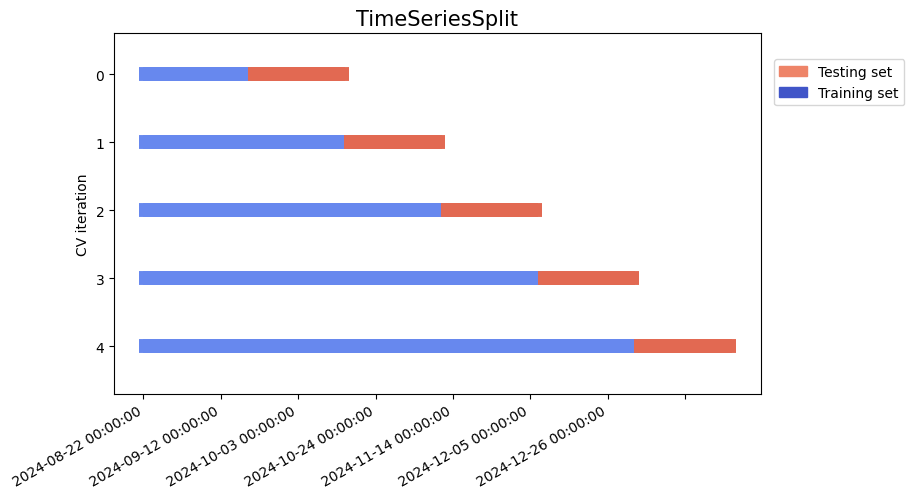

<IPython.core.display.Javascript object>

In [9]:
this_cv = TimeSeriesSplit(n_splits=n_splits)
fig, ax = plt.subplots(figsize=(10, 5))
plot_cv_indices(this_cv, x.set_index(dates), y, ax, n_splits)
ax.legend(
    [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
    ["Testing set", "Training set"],
    loc=(1.02, 0.8),
)
plt.tight_layout()
fig.subplots_adjust(right=0.7)
fig.autofmt_xdate()
plt.show()

In [10]:
x.set_axis(dates)

,feature1,feature2,feature3
2024-08-01,0.496714,0.232254,1.277665
2024-08-02,-0.138264,0.293072,-0.591571
2024-08-03,0.647689,-0.714351,0.547097
2024-08-04,1.523030,1.865775,-0.202193
2024-08-05,-0.234153,0.473833,-0.217681
...,...,...,...
2024-12-27,0.521942,-0.560181,-0.530258
2024-12-28,0.296985,0.747294,-0.792873
2024-12-29,0.250493,0.610370,-0.107030
2024-12-30,0.346448,-0.020902,-1.035242


<IPython.core.display.Javascript object>

In [11]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.dates import DateFormatter
# from matplotlib.patches import Patch
# from sklearn.model_selection import TimeSeriesSplit
# import pandas as pd

# # Generate data
# x, y, dates = generate_data()

# # Create the time series split
# n_splits = 5
# this_cv = TimeSeriesSplit(n_splits=n_splits)

# # Create figure
# fig, ax = plt.subplots(figsize=(10, 5))

# # Convert x to datetime index
# x = x.set_index(dates)  # Changed from pd.to_datetime(dates)

# # Create colormap for CV
# cmap_cv = plt.cm.coolwarm

# # Plot the CV splits
# plot_cv_indices(this_cv, x, y, ax, n_splits)

# # Update the legend
# ax.legend(
#     [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
#     ["Testing set", "Training set"],
#     loc="best"
# )

# # Format the x-axis to show month-year
# ax.xaxis.set_major_formatter(DateFormatter("%b-%Y"))  # Changed from %Y-%M to %b-%Y

# # Rotate date labels
# fig.autofmt_xdate()

# # Label the y-axis
# ax.set_yticks(np.arange(n_splits) + 0.5)
# ax.set_yticklabels([f"Split {i+1}" for i in range(n_splits)])

# plt.tight_layout()
# plt.show()

<IPython.core.display.Javascript object>

In [12]:
def plot_cv_indices(cv, X, y, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            X.index,  # Use the datetime index directly
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Formatting
    ax.set(
        yticks=np.arange(n_splits) + 0.5,
        yticklabels=[f"Split {i+1}" for i in range(n_splits)],
        # xlabel="Date",
        ylabel="CV iteration",
        ylim=[n_splits + 0.2, -0.1],
    )

    # ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    # With these lines:
    title = type(cv).__name__
    formatted_title = "".join(
        [" " + c if c.isupper() and i > 0 else c for i, c in enumerate(title)]
    ).strip()
    ax.set_title(formatted_title, fontsize=15)

    return ax

<IPython.core.display.Javascript object>

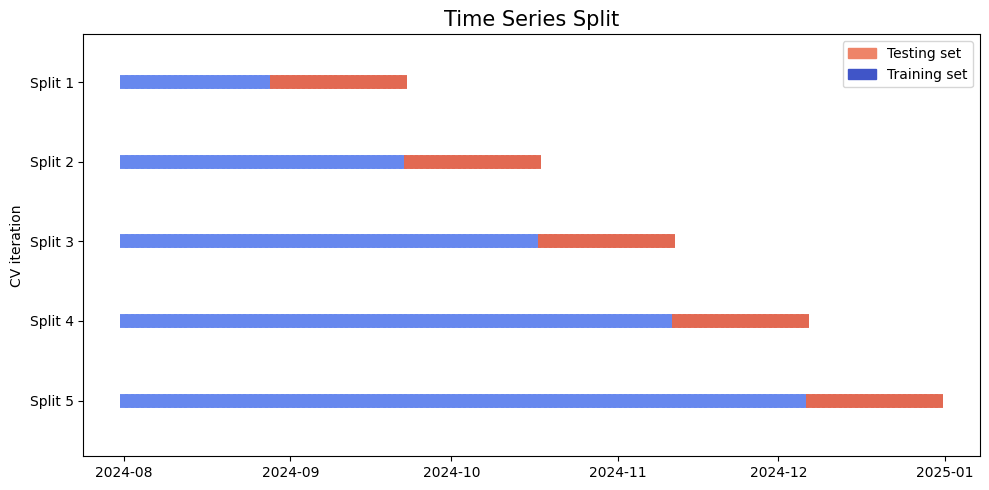

<IPython.core.display.Javascript object>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.patches import Patch
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd

# Generate data
x, y, dates = generate_data()

# Create the time series split
n_splits = 5
this_cv = TimeSeriesSplit(n_splits=n_splits)

# Create figure
fig, ax = plt.subplots(figsize=(10, 5))

# Convert x to datetime index
x = x.set_index(dates)  # Changed from pd.to_datetime(dates)

# Create colormap for CV
cmap_cv = plt.cm.coolwarm

# Plot the CV splits
plot_cv_indices(this_cv, x, y, ax, n_splits)

# Update the legend
ax.legend(
    [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
    ["Testing set", "Training set"],
    loc="best",
)

# Format the x-axis to show month-year
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))  # Changed from %Y-%M to %b-%Y

# Rotate date labels
# fig.autofmt_xdate()

# Label the y-axis
ax.set_yticks(np.arange(n_splits) + 0.5)
ax.set_yticklabels([f"Split {i+1}" for i in range(n_splits)])

plt.tight_layout()

plt.savefig("timeseries_split.png", dpi=300, bbox_inches="tight")

plt.show()

# Blocking time series split example

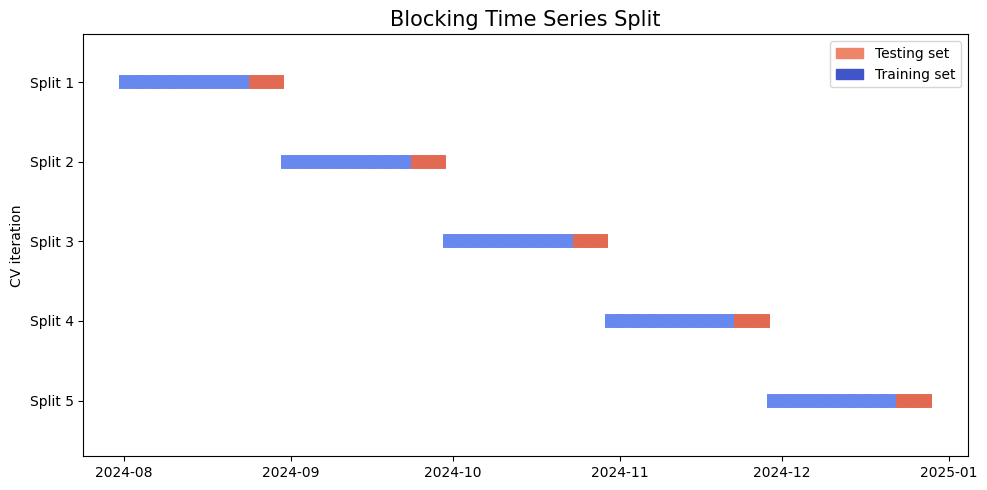

<IPython.core.display.Javascript object>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.patches import Patch
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd

# Generate data
x, y, dates = generate_data()

# Create the time series split
n_splits = 5
this_cv = BlockingTimeSeriesSplit(n_splits=n_splits)

# Create figure
fig, ax = plt.subplots(figsize=(10, 5))

# Convert x to datetime index
x = x.set_index(dates)  # Changed from pd.to_datetime(dates)

# Create colormap for CV
cmap_cv = plt.cm.coolwarm

# Plot the CV splits
plot_cv_indices(this_cv, x, y, ax, n_splits)

# Update the legend
ax.legend(
    [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
    ["Testing set", "Training set"],
    loc="best",
)

# Format the x-axis to show month-year
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))  # Changed from %Y-%M to %b-%Y

# Rotate date labels
# fig.autofmt_xdate()

# Label the y-axis
ax.set_yticks(np.arange(n_splits) + 0.5)
ax.set_yticklabels([f"Split {i+1}" for i in range(n_splits)])

plt.tight_layout()

plt.savefig("blocking_timeseries.png", dpi=300, bbox_inches="tight")

plt.show()